# Benchmark Summarization

This notebook provides comprehensive summary statistics for the C3PO (CHEBI Classification Programs Ontology) Benchmark dataset. The C3PO benchmark is designed to test the ability of models to classify chemical compounds (represented as SMILES strings) into CHEBI ontology classes.

## Purpose and Overview

The analysis in this notebook:
1. Examines the distribution of classes and their properties
2. Analyzes the chemical structures in the dataset
3. Explores relationships between structures and classes
4. Generates summary statistics for evaluation

This data was used to produce CSVs for submission to the [Hugging Face C3PO dataset](https://huggingface.co/datasets/MonarchInit/C3PO).

In [21]:
from pathlib import Path

import pandas as pd


DIR = Path("../../results/2025/benchmark/")

In [22]:
from c3p.datamodel import Dataset

with open(DIR / "dataset.json") as f:
    dataset = Dataset.model_validate_json(f.read())

In [23]:
cls_df = as_df(dataset.classes)

# Display a preview of the classes dataframe
cls_df.head(10)

,id,name,definition,parents,xrefs,all_positive_examples,parents_count,xrefs_count,all_positive_examples_count
0,CHEBI:10036,wax ester,A fatty acid ester resulting from the condensa...,"[CHEBI:35748, CHEBI:73702]","[KEGG:C01629, MetaCyc:Wax-Esters, PMID:1283190...","[C(CCCCCCCC)CCCCC(OCCCCCCCCCCCCCC)=O, O(CCCCCC...",2,16.0,116
1,CHEBI:10283,2-hydroxy fatty acid,Any fatty acid with a hydroxy functional group...,"[CHEBI:24654, CHEBI:49302]","[KEGG:C05102, PMID:6423633, PMID:9826358]","[OC(=O)C(\O)=C/C=C, OC(C(CC)C)C(O)=O, C(CCCCCC...",2,3.0,59
2,CHEBI:10615,omega-hydroxy fatty acid,Any member of the class of naturally-occurring...,"[CHEBI:15734, CHEBI:24654]","[KEGG:C03547, PMID:13771448, PMID:16660004]","[OC(CCCCCCCCCCC(CCCCCCO)O)=O, C(\CCO)=C\C/C=C\...",2,3.0,89
3,CHEBI:11750,3-sn-phosphatidyl-L-serine,A 3-sn-glycerophosphoserine compound having ac...,[CHEBI:18303],"[KEGG:C02737, LIPID_MAPS_instance:LMGP03010000...",[O(C[C@H](COP(=O)(OC[C@@H](C(O)=O)N)O)OC(CCCCC...,1,3.0,29
4,CHEBI:131565,steroid aldehyde,Any steroid substituted by a formyl group.,"[CHEBI:17478, CHEBI:35341]",None,"[CC12CCC3C(C1CCC2(C)O)CCC4C3(CC(C(=O)C4)C=O)C,...",2,NaN,66
5,CHEBI:131619,C27-steroid,A steroid compound with a structure based on a...,[CHEBI:35341],None,[C1[C@@]2([C@]3(CC[C@]4([C@]([C@@]3(CC=C2C[C@H...,1,NaN,40
6,CHEBI:131622,steroidal acyl-CoA(4-),An acyl-CoA(4-) arising from deprotonation of ...,[CHEBI:58342],None,[C(CC[C@]([C@@]1([C@]2([C@H](C[C@@]3([C@]4(CCC...,1,NaN,51
7,CHEBI:131860,octadecanoid anion,An unsaturated fatty acid anion obtained by th...,"[CHEBI:2580, CHEBI:57560]",None,[C(CCCCCCC/C=C\C([C@H]1[C@H](CCCCC)O1)O)(=O)[O...,2,NaN,80
8,CHEBI:131863,docosanoid,Any oxygenated derivative of C22 polyunsaturat...,"[CHEBI:15904, CHEBI:26208]",None,[C(C(O)=O)C/C=C\C/C=C\C/C=C\C/C=C\C/C=C\C/C=C\...,2,NaN,102
9,CHEBI:131864,docosanoid anion,A polyunsaturated fatty acid anion obtained by...,[CHEBI:57560],None,[C(\C=C\C=C\[C@H]1[C@@H](O1)C/C=C\C/C=C\CC)=C\...,1,NaN,94


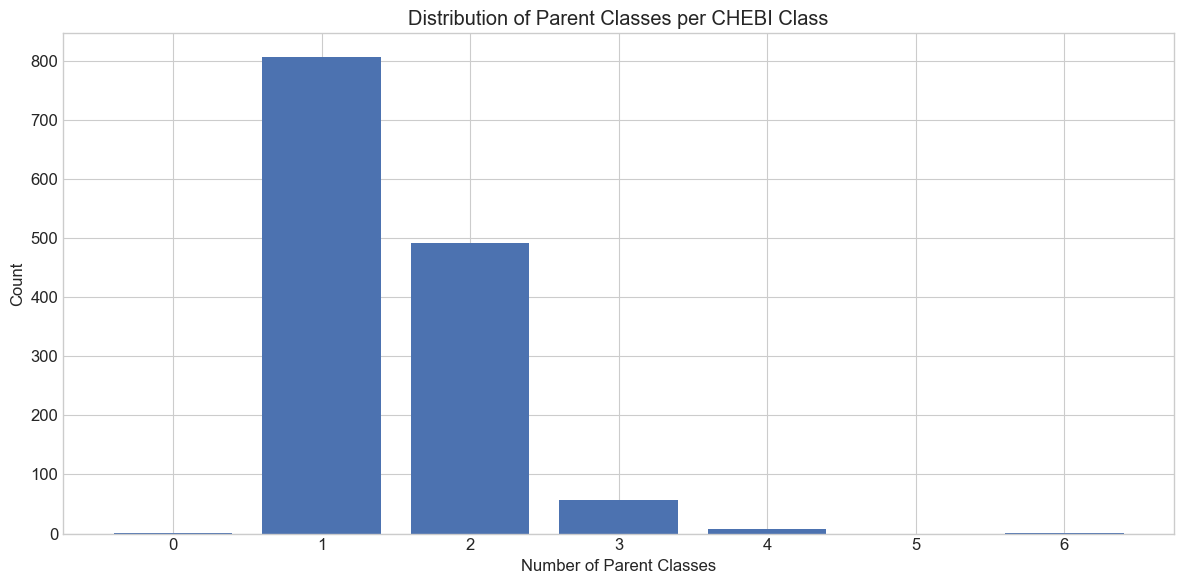

Summary of parents per class:
- Total classes: 1364
- Average parents per class: 1.46
- Maximum parents for a class: 6
- Classes with no parents: 1


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12, 6))

# Create bar chart for parents count distribution
count_values = cls_df['parents_count'].value_counts().sort_index()
plt.bar(count_values.index, count_values.values)
plt.title('Distribution of Parent Classes per CHEBI Class')
plt.xlabel('Number of Parent Classes')
plt.ylabel('Count')
plt.xticks(range(0, int(cls_df['parents_count'].max()) + 1))
plt.tight_layout()
plt.show()

# Summary statistics for parents_count
print("Summary of parents per class:")
print(f"- Total classes: {len(cls_df)}")
print(f"- Average parents per class: {cls_df['parents_count'].mean():.2f}")
print(f"- Maximum parents for a class: {cls_df['parents_count'].max()}")
print(f"- Classes with no parents: {len(cls_df[cls_df['parents_count'] == 0])}")

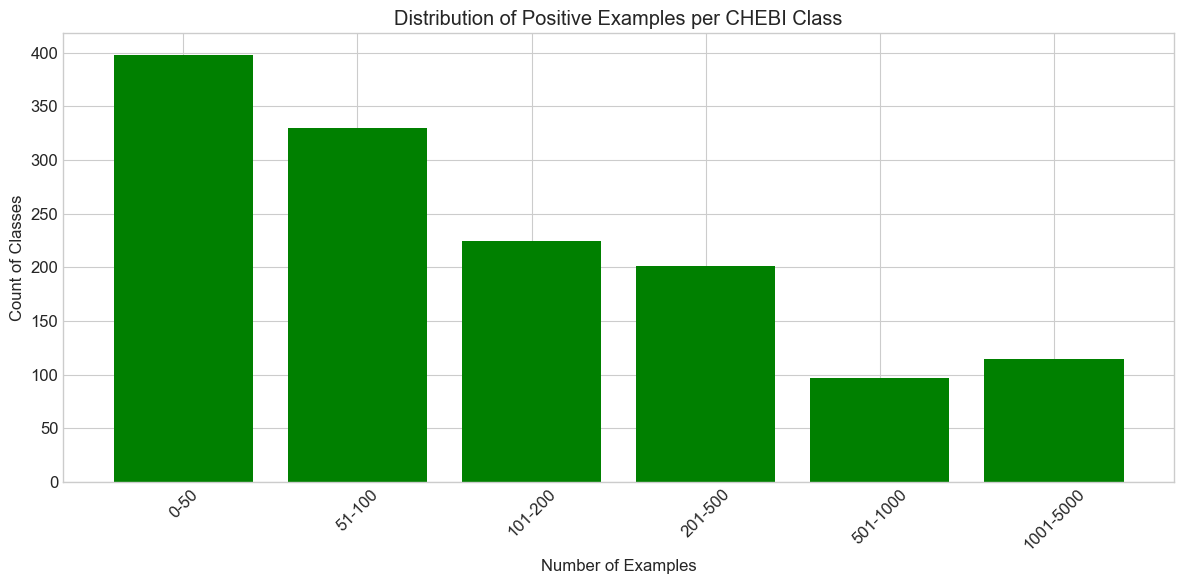

Summary of examples per class:
- Average examples per class: 326.36
- Median examples per class: 90.00
- Maximum examples for a class: 4927
- Minimum examples for a class: 25


In [25]:
# Analyze distribution of examples per class
plt.figure(figsize=(12, 6))

# Bin the counts for better visualization
bins = [0, 50, 100, 200, 500, 1000, 5000]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000']
binned_counts = pd.cut(cls_df['all_positive_examples_count'], bins=bins, labels=labels)
binned_distribution = binned_counts.value_counts().sort_index()

plt.bar(binned_distribution.index, binned_distribution.values, color='green')
plt.title('Distribution of Positive Examples per CHEBI Class')
plt.xlabel('Number of Examples')
plt.ylabel('Count of Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for examples per class
print("Summary of examples per class:")
print(f"- Average examples per class: {cls_df['all_positive_examples_count'].mean():.2f}")
print(f"- Median examples per class: {cls_df['all_positive_examples_count'].median():.2f}")
print(f"- Maximum examples for a class: {cls_df['all_positive_examples_count'].max()}")
print(f"- Minimum examples for a class: {cls_df['all_positive_examples_count'].min()}")

## Chemical Structures Analysis

Next, we'll analyze the chemical structures in our dataset. We'll examine their distribution, complexity (based on SMILES length), and their relationship to CHEBI classes.

## CHEBI Classes Analysis

The dataframe above contains information about each CHEBI class in the benchmark. Let's examine the distribution of key properties including:

- Parent class relationships
- Cross-references to external databases
- Number of positive examples per class

Let's check how many structures are part of the validation set and examine the distribution of structures across CHEBI classes.

In [26]:
cls_df = as_df(dataset.classes)
cls_df

,id,name,definition,parents,xrefs,all_positive_examples,parents_count,xrefs_count,all_positive_examples_count
0,CHEBI:10036,wax ester,A fatty acid ester resulting from the condensa...,"[CHEBI:35748, CHEBI:73702]","[KEGG:C01629, MetaCyc:Wax-Esters, PMID:1283190...","[C(CCCCCCCC)CCCCC(OCCCCCCCCCCCCCC)=O, O(CCCCCC...",2,16.0,116
1,CHEBI:10283,2-hydroxy fatty acid,Any fatty acid with a hydroxy functional group...,"[CHEBI:24654, CHEBI:49302]","[KEGG:C05102, PMID:6423633, PMID:9826358]","[OC(=O)C(\O)=C/C=C, OC(C(CC)C)C(O)=O, C(CCCCCC...",2,3.0,59
2,CHEBI:10615,omega-hydroxy fatty acid,Any member of the class of naturally-occurring...,"[CHEBI:15734, CHEBI:24654]","[KEGG:C03547, PMID:13771448, PMID:16660004]","[OC(CCCCCCCCCCC(CCCCCCO)O)=O, C(\CCO)=C\C/C=C\...",2,3.0,89
3,CHEBI:11750,3-sn-phosphatidyl-L-serine,A 3-sn-glycerophosphoserine compound having ac...,[CHEBI:18303],"[KEGG:C02737, LIPID_MAPS_instance:LMGP03010000...",[O(C[C@H](COP(=O)(OC[C@@H](C(O)=O)N)O)OC(CCCCC...,1,3.0,29
4,CHEBI:131565,steroid aldehyde,Any steroid substituted by a formyl group.,"[CHEBI:17478, CHEBI:35341]",None,"[CC12CCC3C(C1CCC2(C)O)CCC4C3(CC(C(=O)C4)C=O)C,...",2,NaN,66
...,...,...,...,...,...,...,...,...,...
1359,CHEBI:90546,medium-chain fatty acyl-CoA(4-),An acyl-CoA oxoanion that results from deproto...,[CHEBI:77636],[MetaCyc:Medium-Chain-Acyl-CoAs],[[C@@H]1(N2C3=C(C(=NC=N3)N)N=C2)O[C@H](COP(OP(...,1,1.0,59
1360,CHEBI:90726,3-oxoacyl-CoA(4-),An acyl-CoA(4-) arising from deprotonation of ...,[CHEBI:58342],None,[[C@@H]1(N2C3=C(C(=NC=N3)N)N=C2)O[C@H](COP(OP(...,1,NaN,66
1361,CHEBI:90736,very long-chain acyl-CoA(4-),An acyl-CoA(4-) obtained by deprotonation of t...,[CHEBI:58342],None,[CCCCCCCCCCCCCCCCCCCCCCCCCC(=O)SCCNC(=O)CCNC(=...,1,NaN,67
1362,CHEBI:90799,dipeptide zwitterion,Any peptide zwitterion comprising two amino ac...,[CHEBI:60466],None,"[[NH3+]CC(=O)N[C@H](C(=O)[O-])CC=1C=CC=CC1, C(...",1,NaN,60


In [27]:
cls_df.describe(include='all')


,id,name,definition,parents,xrefs,all_positive_examples,parents_count,xrefs_count,all_positive_examples_count
count,1364,1364,1364,1364,367,1364,1364.000000,367.000000,1364.000000
unique,1364,1364,1364,951,358,1334,NaN,NaN,NaN
top,CHEBI:10036,wax ester,A fatty acid ester resulting from the condensa...,[CHEBI:83821],[PMID:23383323],[C1(=CC2=CC(=C1Cl)NC(C[C@@H]([C@]3([C@]([C@@H]...,NaN,NaN,NaN
freq,1,1,1,19,5,3,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.462610,2.343324,326.355572
std,NaN,NaN,NaN,NaN,NaN,NaN,0.615937,2.831681,648.807467
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,45.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,90.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,275.250000


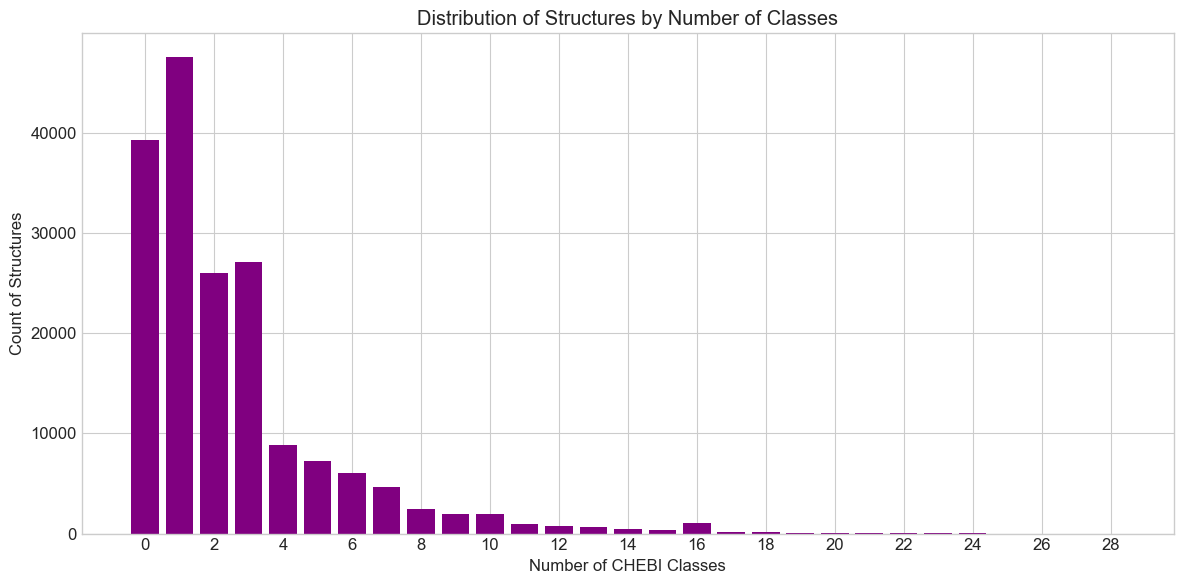

Validation set size: 35575 structures (20.00% of total)

Structure membership in CHEBI classes:
- Structures not belonging to any class: 39340
- Structures belonging to exactly one class: 47576
- Structures belonging to multiple classes: 90959
- Maximum classes per structure: 28


In [28]:
# Analyze the distribution of structures by class count
plt.figure(figsize=(12, 6))

# Create bar chart for class membership count
class_count_distribution = structures_df['cls_ids_count'].value_counts().sort_index()
plt.bar(class_count_distribution.index, class_count_distribution.values, color='purple')
plt.title('Distribution of Structures by Number of Classes')
plt.xlabel('Number of CHEBI Classes')
plt.ylabel('Count of Structures')
plt.xticks(range(0, int(structures_df['cls_ids_count'].max()) + 1, 2))
plt.tight_layout()
plt.show()

# Print validation set information
validation_count = structures_df['in_validation_set'].sum()
print(f"Validation set size: {validation_count} structures ({validation_count/len(structures_df)*100:.2f}% of total)")

# Print structure distribution statistics
print("\nStructure membership in CHEBI classes:")
print(f"- Structures not belonging to any class: {len(structures_df[structures_df['cls_ids_count'] == 0])}")
print(f"- Structures belonging to exactly one class: {len(structures_df[structures_df['cls_ids_count'] == 1])}")
print(f"- Structures belonging to multiple classes: {len(structures_df[structures_df['cls_ids_count'] > 1])}")
print(f"- Maximum classes per structure: {structures_df['cls_ids_count'].max()}")

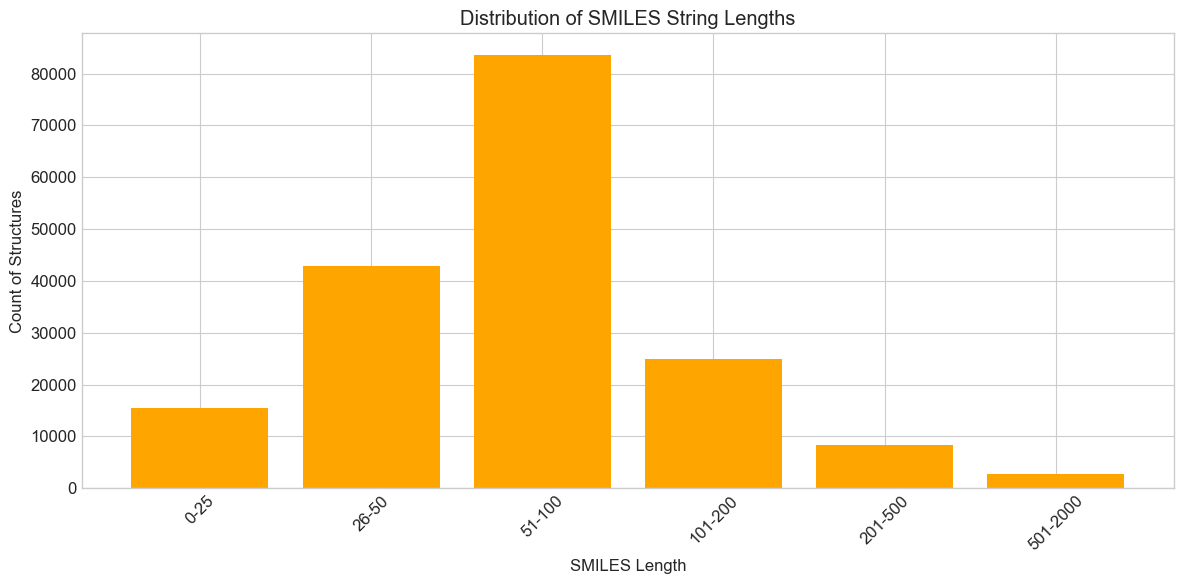

SMILES length statistics:
- Average SMILES length: 88.41
- Median SMILES length: 66.00
- Minimum SMILES length: 2
- Maximum SMILES length: 1822


In [29]:
# Analyze SMILES string length as a measure of molecular complexity
plt.figure(figsize=(12, 6))

# Bin the lengths for better visualization
bins = [0, 25, 50, 100, 200, 500, 2000]
labels = ['0-25', '26-50', '51-100', '101-200', '201-500', '501-2000']
binned_lengths = pd.cut(structures_df['smiles_length'], bins=bins, labels=labels)
length_distribution = binned_lengths.value_counts().sort_index()

plt.bar(length_distribution.index, length_distribution.values, color='orange')
plt.title('Distribution of SMILES String Lengths')
plt.xlabel('SMILES Length')
plt.ylabel('Count of Structures')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print SMILES length statistics
print("SMILES length statistics:")
print(f"- Average SMILES length: {structures_df['smiles_length'].mean():.2f}")
print(f"- Median SMILES length: {structures_df['smiles_length'].median():.2f}")
print(f"- Minimum SMILES length: {structures_df['smiles_length'].min()}")
print(f"- Maximum SMILES length: {structures_df['smiles_length'].max()}")

In [30]:
structures_df = as_df(dataset.structures)
structures_df

,name,smiles
0,(+)-Atherospermoline,COc1cc2CCN(C)[C@H]3Cc4ccc(Oc5cc(C[C@@H]6N(C)CC...
1,(-)-medicarpin,[H][C@@]12COc3cc(O)ccc3[C@]1([H])Oc1cc(OC)ccc21
2,Vismione D,CC(C)=CCC\C(C)=C\COc1cc(O)c2c(O)c3C(=O)CC(C)(O...
3,"(2S,3S,4R)-3-[4-(3-cyclopentylprop-1-ynyl)phen...",COCC(=O)N1[C@H]([C@H]([C@H]1C#N)C2=CC=C(C=C2)C...
4,"N-[(2R,3S,6R)-2-(hydroxymethyl)-6-[2-[[oxo-[4-...",C1C[C@@H]([C@@H](O[C@H]1CCNC(=O)NC2=CC=C(C=C2)...
...,...,...
177870,"2-[(2S,4aS,12aS)-5-methyl-6-oxo-8-[(1-oxo-2-ph...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...
177871,"N-[(1S,3S,4aR,9aS)-3-[2-[(2,5-difluorophenyl)m...",C1[C@H](O[C@H]([C@@H]2[C@H]1C3=C(O2)C=CC(=C3)N...
177872,"N-[(2S,4aS,12aS)-2-[2-(cyclohexylmethylamino)-...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...
177873,"N-[[(3S,9S,10R)-16-(dimethylamino)-12-[(2S)-1-...",C[C@H]1CCCCO[C@@H]([C@@H](CN(C(=O)C2=C(O1)C=CC...


In [31]:
validation_set = set(dataset.validation_examples)
def is_in_validation_set(row):
    return row["smiles"] in validation_set

structures_df["in_validation_set"] = structures_df.apply(is_in_validation_set, axis=1)
structures_df

,name,smiles,in_validation_set
0,(+)-Atherospermoline,COc1cc2CCN(C)[C@H]3Cc4ccc(Oc5cc(C[C@@H]6N(C)CC...,False
1,(-)-medicarpin,[H][C@@]12COc3cc(O)ccc3[C@]1([H])Oc1cc(OC)ccc21,False
2,Vismione D,CC(C)=CCC\C(C)=C\COc1cc(O)c2c(O)c3C(=O)CC(C)(O...,False
3,"(2S,3S,4R)-3-[4-(3-cyclopentylprop-1-ynyl)phen...",COCC(=O)N1[C@H]([C@H]([C@H]1C#N)C2=CC=C(C=C2)C...,False
4,"N-[(2R,3S,6R)-2-(hydroxymethyl)-6-[2-[[oxo-[4-...",C1C[C@@H]([C@@H](O[C@H]1CCNC(=O)NC2=CC=C(C=C2)...,False
...,...,...,...
177870,"2-[(2S,4aS,12aS)-5-methyl-6-oxo-8-[(1-oxo-2-ph...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...,False
177871,"N-[(1S,3S,4aR,9aS)-3-[2-[(2,5-difluorophenyl)m...",C1[C@H](O[C@H]([C@@H]2[C@H]1C3=C(O2)C=CC(=C3)N...,False
177872,"N-[(2S,4aS,12aS)-2-[2-(cyclohexylmethylamino)-...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...,True
177873,"N-[[(3S,9S,10R)-16-(dimethylamino)-12-[(2S)-1-...",C[C@H]1CCCCO[C@@H]([C@@H](CN(C(=O)C2=C(O1)C=CC...,False


In [32]:
from collections import defaultdict

smiles_to_cls_id = defaultdict(set)
for cls in dataset.classes:
    for smiles in cls.all_positive_examples:
        smiles_to_cls_id[smiles].add(cls.id)

In [33]:
structures_df["cls_ids"] = structures_df["smiles"].apply(lambda x: smiles_to_cls_id[x])
structures_df

,name,smiles,in_validation_set,cls_ids
0,(+)-Atherospermoline,COc1cc2CCN(C)[C@H]3Cc4ccc(Oc5cc(C[C@@H]6N(C)CC...,False,"{CHEBI:24921, CHEBI:133004, CHEBI:22750, CHEBI..."
1,(-)-medicarpin,[H][C@@]12COc3cc(O)ccc3[C@]1([H])Oc1cc(OC)ccc21,False,"{CHEBI:38834, CHEBI:72544, CHEBI:26377}"
2,Vismione D,CC(C)=CCC\C(C)=C\COc1cc(O)c2c(O)c3C(=O)CC(C)(O...,False,"{CHEBI:51269, CHEBI:38032, CHEBI:35294, CHEBI:..."
3,"(2S,3S,4R)-3-[4-(3-cyclopentylprop-1-ynyl)phen...",COCC(=O)N1[C@H]([C@H]([C@H]1C#N)C2=CC=C(C=C2)C...,False,{CHEBI:36820}
4,"N-[(2R,3S,6R)-2-(hydroxymethyl)-6-[2-[[oxo-[4-...",C1C[C@@H]([C@@H](O[C@H]1CCNC(=O)NC2=CC=C(C=C2)...,False,{CHEBI:20857}
...,...,...,...,...
177870,"2-[(2S,4aS,12aS)-5-methyl-6-oxo-8-[(1-oxo-2-ph...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...,False,{CHEBI:22160}
177871,"N-[(1S,3S,4aR,9aS)-3-[2-[(2,5-difluorophenyl)m...",C1[C@H](O[C@H]([C@@H]2[C@H]1C3=C(O2)C=CC(=C3)N...,False,{CHEBI:74927}
177872,"N-[(2S,4aS,12aS)-2-[2-(cyclohexylmethylamino)-...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...,True,{CHEBI:17792}
177873,"N-[[(3S,9S,10R)-16-(dimethylamino)-12-[(2S)-1-...",C[C@H]1CCCCO[C@@H]([C@@H](CN(C(=O)C2=C(O1)C=CC...,False,{}


In [34]:
structures_df["cls_ids_count"] = structures_df["cls_ids"].apply(len)
structures_df

,name,smiles,in_validation_set,cls_ids,cls_ids_count
0,(+)-Atherospermoline,COc1cc2CCN(C)[C@H]3Cc4ccc(Oc5cc(C[C@@H]6N(C)CC...,False,"{CHEBI:24921, CHEBI:133004, CHEBI:22750, CHEBI...",4
1,(-)-medicarpin,[H][C@@]12COc3cc(O)ccc3[C@]1([H])Oc1cc(OC)ccc21,False,"{CHEBI:38834, CHEBI:72544, CHEBI:26377}",3
2,Vismione D,CC(C)=CCC\C(C)=C\COc1cc(O)c2c(O)c3C(=O)CC(C)(O...,False,"{CHEBI:51269, CHEBI:38032, CHEBI:35294, CHEBI:...",4
3,"(2S,3S,4R)-3-[4-(3-cyclopentylprop-1-ynyl)phen...",COCC(=O)N1[C@H]([C@H]([C@H]1C#N)C2=CC=C(C=C2)C...,False,{CHEBI:36820},1
4,"N-[(2R,3S,6R)-2-(hydroxymethyl)-6-[2-[[oxo-[4-...",C1C[C@@H]([C@@H](O[C@H]1CCNC(=O)NC2=CC=C(C=C2)...,False,{CHEBI:20857},1
...,...,...,...,...,...
177870,"2-[(2S,4aS,12aS)-5-methyl-6-oxo-8-[(1-oxo-2-ph...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...,False,{CHEBI:22160},1
177871,"N-[(1S,3S,4aR,9aS)-3-[2-[(2,5-difluorophenyl)m...",C1[C@H](O[C@H]([C@@H]2[C@H]1C3=C(O2)C=CC(=C3)N...,False,{CHEBI:74927},1
177872,"N-[(2S,4aS,12aS)-2-[2-(cyclohexylmethylamino)-...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...,True,{CHEBI:17792},1
177873,"N-[[(3S,9S,10R)-16-(dimethylamino)-12-[(2S)-1-...",C[C@H]1CCCCO[C@@H]([C@@H](CN(C(=O)C2=C(O1)C=CC...,False,{},0


In [35]:
structures_df["smiles_length"] = structures_df["smiles"].apply(len)
structures_df

,name,smiles,in_validation_set,cls_ids,cls_ids_count,smiles_length
0,(+)-Atherospermoline,COc1cc2CCN(C)[C@H]3Cc4ccc(Oc5cc(C[C@@H]6N(C)CC...,False,"{CHEBI:24921, CHEBI:133004, CHEBI:22750, CHEBI...",4,81
1,(-)-medicarpin,[H][C@@]12COc3cc(O)ccc3[C@]1([H])Oc1cc(OC)ccc21,False,"{CHEBI:38834, CHEBI:72544, CHEBI:26377}",3,47
2,Vismione D,CC(C)=CCC\C(C)=C\COc1cc(O)c2c(O)c3C(=O)CC(C)(O...,False,"{CHEBI:51269, CHEBI:38032, CHEBI:35294, CHEBI:...",4,55
3,"(2S,3S,4R)-3-[4-(3-cyclopentylprop-1-ynyl)phen...",COCC(=O)N1[C@H]([C@H]([C@H]1C#N)C2=CC=C(C=C2)C...,False,{CHEBI:36820},1,59
4,"N-[(2R,3S,6R)-2-(hydroxymethyl)-6-[2-[[oxo-[4-...",C1C[C@@H]([C@@H](O[C@H]1CCNC(=O)NC2=CC=C(C=C2)...,False,{CHEBI:20857},1,75
...,...,...,...,...,...,...
177870,"2-[(2S,4aS,12aS)-5-methyl-6-oxo-8-[(1-oxo-2-ph...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...,False,{CHEBI:22160},1,76
177871,"N-[(1S,3S,4aR,9aS)-3-[2-[(2,5-difluorophenyl)m...",C1[C@H](O[C@H]([C@@H]2[C@H]1C3=C(O2)C=CC(=C3)N...,False,{CHEBI:74927},1,98
177872,"N-[(2S,4aS,12aS)-2-[2-(cyclohexylmethylamino)-...",CN1[C@H]2CC[C@H](O[C@@H]2COC3=C(C1=O)C=C(C=C3)...,True,{CHEBI:17792},1,83
177873,"N-[[(3S,9S,10R)-16-(dimethylamino)-12-[(2S)-1-...",C[C@H]1CCCCO[C@@H]([C@@H](CN(C(=O)C2=C(O1)C=CC...,False,{},0,94


In [36]:
structures_df["has_wildcard"] = structures_df["smiles"].apply(lambda x: "*" in x)
structures_df["wildcard_count"] = structures_df["smiles"].apply(lambda x: x.count("*"))


In [37]:
# describe both categorical and quantitative
structures_df.describe(include='all')

,name,smiles,in_validation_set,cls_ids,cls_ids_count,smiles_length,has_wildcard,wildcard_count
count,177875,177875,177875,177875,177875.000000,177875.000000,177875,177875.0
unique,177875,177875,2,13455,NaN,NaN,1,NaN
top,(+)-Atherospermoline,COc1cc2CCN(C)[C@H]3Cc4ccc(Oc5cc(C[C@@H]6N(C)CC...,False,{},NaN,NaN,False,NaN
freq,1,1,142300,39340,NaN,NaN,177875,NaN
mean,NaN,NaN,NaN,NaN,2.499328,88.412565,NaN,0.0
std,NaN,NaN,NaN,NaN,2.935356,99.313098,NaN,0.0
min,NaN,NaN,NaN,NaN,0.000000,2.000000,NaN,0.0
25%,NaN,NaN,NaN,NaN,1.000000,43.000000,NaN,0.0
50%,NaN,NaN,NaN,NaN,2.000000,66.000000,NaN,0.0
75%,NaN,NaN,NaN,NaN,3.000000,92.000000,NaN,0.0


In [38]:
classes_slim_df = cls_df[cls_df["xrefs_count"] > 0]

In [39]:
structures_df.to_csv(DIR / "structures.csv", index=False)
cls_df.to_csv(DIR / "classes.csv", index=False)
classes_slim_df.to_csv(DIR / "classes_slim.csv", index=False)


In [40]:
# also save summaries
cls_df.describe().T.to_csv(DIR / "classes_summary.csv")
classes_slim_df.describe().T.to_csv(DIR / "classes_slim_summary.csv")
structures_df.describe().T.to_csv(DIR / "structures_summary.csv")

In [41]:
#{k: v for k, [v] in dataset.model_dump().items() if not isinstance(v, list)}

In [42]:
metadata = pd.DataFrame({k: [v] for k, v in dataset.model_dump().items() if not isinstance(v, list)})
metadata.to_csv(DIR / "metadata.csv", index=False)

In [43]:
metadata

,ontology_version,min_members,max_members
0,chebi237,25,5000
